## Import dependencies

In [4]:
import numpy as np
import pandas as pd

In [5]:
#loading the data
channel_spend = pd.read_csv("channel_spend.csv")
sales_revenue = pd.read_csv("sales_revenue.csv")
customer_ltv = pd.read_csv("customer_ltv.csv")
influencer_breakdown = pd.read_csv("influencer_breakdown.csv")

In [6]:
print(channel_spend.head())
print(sales_revenue.head())
print(customer_ltv.head())
print(influencer_breakdown.head())

     month               channel     spend  impressions  clicks    cpm   cpc  \
0  2023-01          Facebook Ads  54133.44      5092038   39309  10.63  1.38   
1  2023-01            Google Ads  64679.02      3854947   81994  16.78  0.79   
2  2023-01                   SMS   5161.99        86463   16947  59.70  0.30   
3  2023-01                 Email   3938.94       201044   27836  19.59  0.14   
4  2023-01  Influencer Marketing  23725.34      3076662   51703   7.71  0.46   

      ctr  conversion_rate  
0  0.0077           0.0167  
1  0.0213           0.0330  
2  0.1960           0.0678  
3  0.1385           0.0551  
4  0.0168           0.0473  
     month               channel  purchases    revenue   returns      roi
0  2023-01          Facebook Ads        656  102429.01  19084.75   0.8922
1  2023-01            Google Ads       2706  559647.08  80255.51   7.6527
2  2023-01                   SMS       1149  152799.20  24839.28  28.6008
3  2023-01                 Email       1534  1874

In [7]:
channel_spend['month'] = pd.to_datetime(channel_spend['month'])
customer_ltv['month'] = pd.to_datetime(customer_ltv['month'])
sales_revenue['month'] = pd.to_datetime(sales_revenue['month'])
channel_spend = channel_spend.fillna(0)

In [8]:
print(channel_spend.head())

       month               channel     spend  impressions  clicks    cpm  \
0 2023-01-01          Facebook Ads  54133.44      5092038   39309  10.63   
1 2023-01-01            Google Ads  64679.02      3854947   81994  16.78   
2 2023-01-01                   SMS   5161.99        86463   16947  59.70   
3 2023-01-01                 Email   3938.94       201044   27836  19.59   
4 2023-01-01  Influencer Marketing  23725.34      3076662   51703   7.71   

    cpc     ctr  conversion_rate  
0  1.38  0.0077           0.0167  
1  0.79  0.0213           0.0330  
2  0.30  0.1960           0.0678  
3  0.14  0.1385           0.0551  
4  0.46  0.0168           0.0473  


In [9]:
merged_table = (channel_spend
    .merge(sales_revenue, on=['month', 'channel'])
    .merge(customer_ltv, on=['month', 'channel']))
print(merged_table.head())

       month               channel     spend  impressions  clicks    cpm  \
0 2023-01-01          Facebook Ads  54133.44      5092038   39309  10.63   
1 2023-01-01            Google Ads  64679.02      3854947   81994  16.78   
2 2023-01-01                   SMS   5161.99        86463   16947  59.70   
3 2023-01-01                 Email   3938.94       201044   27836  19.59   
4 2023-01-01  Influencer Marketing  23725.34      3076662   51703   7.71   

    cpc     ctr  conversion_rate  purchases    revenue   returns      roi  \
0  1.38  0.0077           0.0167        656  102429.01  19084.75   0.8922   
1  0.79  0.0213           0.0330       2706  559647.08  80255.51   7.6527   
2  0.30  0.1960           0.0678       1149  152799.20  24839.28  28.6008   
3  0.14  0.1385           0.0551       1534  187422.53  25073.35  46.5820   
4  0.46  0.0168           0.0473       2446  299629.41  55314.48  11.6291   

   new_customers  avg_ltv     cac  ltv_cac_ratio  retention_rate  
0            

In [10]:
merged_table['check_roi'] = (merged_table['revenue'] - merged_table['spend']) / merged_table['spend']
merged_table['LTV_CAC_RATIO'] = merged_table['avg_ltv'] / merged_table['cac']
print(merged_table.check_roi.head())

0     0.892158
1     7.652683
2    28.600832
3    46.581971
4    11.629088
Name: check_roi, dtype: float64


In [11]:
print(merged_table.groupby('channel')['check_roi'].mean().sort_values(ascending=False))

channel
Email                   37.700681
Organic Content         23.171215
SMS                     16.800223
Influencer Marketing    13.164657
Google Ads               2.844328
Facebook Ads             1.343144
Name: check_roi, dtype: float64


In [12]:
summary = merged_table.groupby('channel')[['spend','revenue']].sum()
print(summary)

                           spend     revenue
channel                                     
Email                   99362.01  3859700.11
Facebook Ads          1474536.26  3456864.88
Google Ads            1774992.77  6743110.13
Influencer Marketing   637448.55  9109751.72
Organic Content         75329.94  1810146.39
SMS                    126238.12  2253894.79


In [13]:
##The projection of Each platforms ROI over the span of 2 years


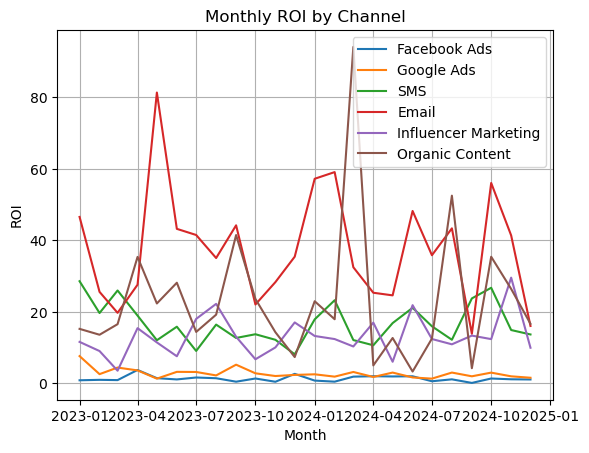

In [19]:
import matplotlib.pyplot as plt
for ch in merged_table['channel'].unique():
    subset = merged_table[merged_table['channel'] == ch]
    plt.plot(subset['month'], subset['check_roi'], label=ch)

plt.xlabel("Month")
plt.ylabel("ROI")
plt.grid(True)
plt.legend(); plt.title("Monthly ROI by Channel"); plt.show()



In [20]:
##Each channels ROI vs spend

Text(0.5, 1.0, 'ROI vs Spend by Channel')

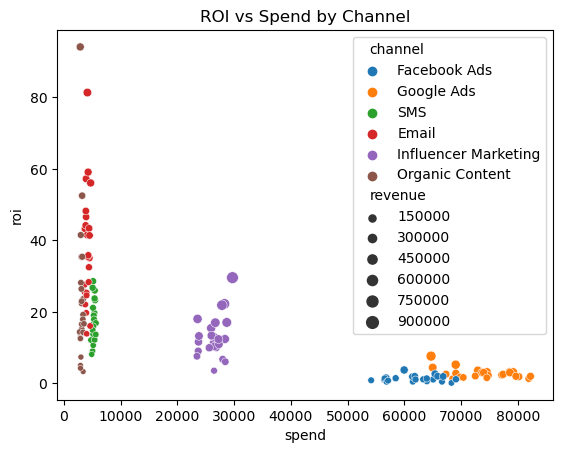

In [24]:
import seaborn as sns
sns.scatterplot(data=merged_table, x='spend', y='roi', hue='channel', size='revenue')
plt.title("ROI vs Spend by Channel")



Text(0.5, 1.0, 'LTV:CAC Ratio by Channel')

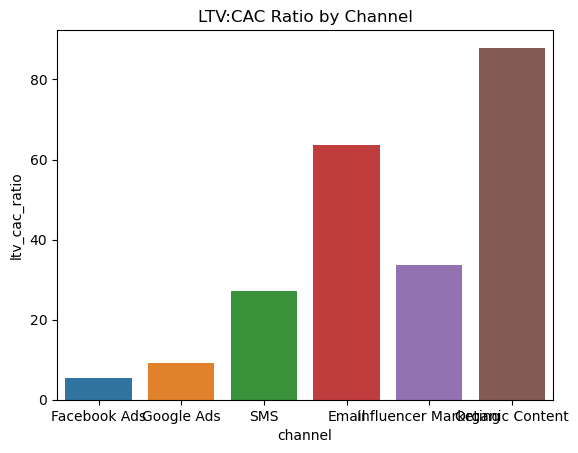

In [28]:
sns.barplot(data=merged_table, x='channel', y='ltv_cac_ratio', errorbar=None)
plt.title("LTV:CAC Ratio by Channel")


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


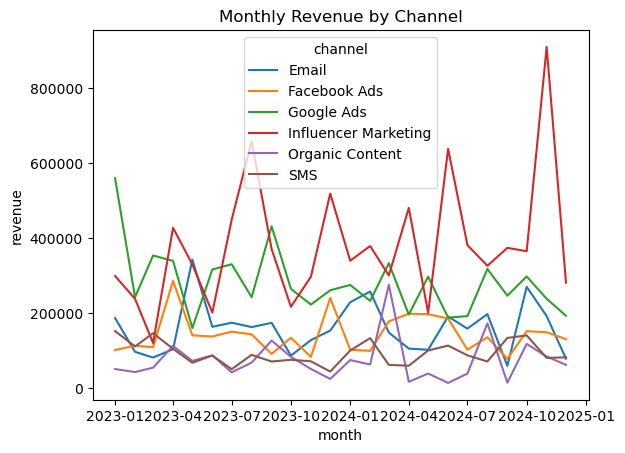

In [32]:
revenue_trend = merged_table.groupby(['month','channel'])['revenue'].sum().reset_index()
sns.lineplot(data=revenue_trend, x='month', y='revenue', hue='channel')
plt.title("Monthly Revenue by Channel")
merged_table.to_csv("merged_table.csv", index=False)


In [30]:
##Predicting Marketing Channel ROI and Revenue Growth Using Machine Learning (2-Year Forecast)

In [2]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
merged_table = pd.read_csv("merged_table.csv")
predictions = {}

for ch in merged_table['channel'].unique():
    subset = merged_table[merged_table['channel'] == ch]

    X = subset[['spend']]
    y = subset['revenue']

    model = LinearRegression()
    model.fit(X, y)

    future_spend = pd.DataFrame({'spend': [80000, 85000, 90000, 95000]})
    future_revenue = model.predict(future_spend)

    predictions[ch] = future_revenue
for ch, preds in predictions.items():
    print(ch, preds)



Facebook Ads [188178.71456901 200069.96602818 211961.21748735 223852.46894652]
Google Ads [248827.27824937 222233.58867902 195639.89910868 169046.20953833]
SMS [3943438.07106301 4200965.61679141 4458493.16251981 4716020.70824821]
Email [4926791.94870904 5240921.68588709 5555051.42306515 5869181.16024321]
Influencer Marketing [2719759.91283493 2938715.98741595 3157672.06199697 3376628.13657798]
Organic Content [ -970824.37834253 -1038885.14436976 -1106945.910397   -1175006.67642423]


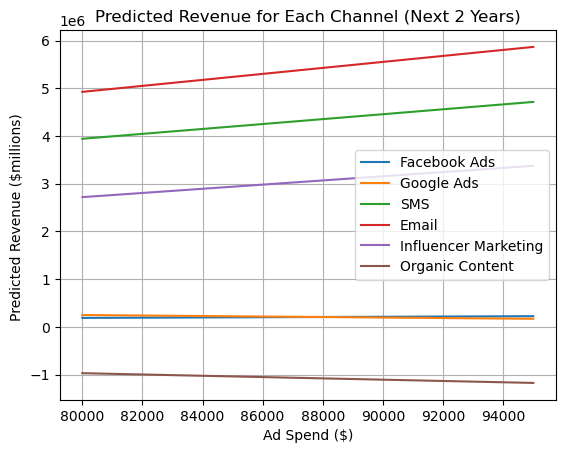

In [7]:
import matplotlib.pyplot as plt

for ch, preds in predictions.items():
    plt.plot(future_spend, preds, label=ch)

plt.title("Predicted Revenue for Each Channel (Next 2 Years)")
plt.xlabel("Ad Spend ($)")
plt.ylabel("Predicted Revenue ($millions) ")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
predicted_roi = {}
merged_table['month'] = pd.to_datetime(merged_table['month'])
merged_table['month_num'] = (merged_table['month'] - merged_table['month'].min()).dt.days // 30

for ch in merged_table["channel"].unique():
    subset = merged_table[merged_table['channel'] == ch]
    X = subset[['month_num']]
    y = subset["roi"]
    model = LinearRegression()
    model.fit(X, y)

    last_month = subset['month_num'].max()
    future_months = np.arange(last_month + 1, last_month + 25).reshape(-1, 1)
    future_dates = pd.date_range(subset['month'].max() + pd.offsets.MonthBegin(1), periods=24, freq='MS')
    future_roi = model.predict(future_months)
    predictions[ch] = pd.DataFrame({'month': future_dates, 'predicted_ROI': future_roi})
print(predictions['Facebook Ads'])


        month  predicted_ROI
0  2025-01-01       1.151540
1  2025-02-01       1.136263
2  2025-03-01       1.120986
3  2025-04-01       1.105709
4  2025-05-01       1.090432
5  2025-06-01       1.075155
6  2025-07-01       1.059877
7  2025-08-01       1.044600
8  2025-09-01       1.029323
9  2025-10-01       1.014046
10 2025-11-01       0.998769
11 2025-12-01       0.983492
12 2026-01-01       0.968214
13 2026-02-01       0.952937
14 2026-03-01       0.937660
15 2026-04-01       0.922383
16 2026-05-01       0.907106
17 2026-06-01       0.891828
18 2026-07-01       0.876551
19 2026-08-01       0.861274
20 2026-09-01       0.845997
21 2026-10-01       0.830720
22 2026-11-01       0.815443
23 2026-12-01       0.800165


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted w

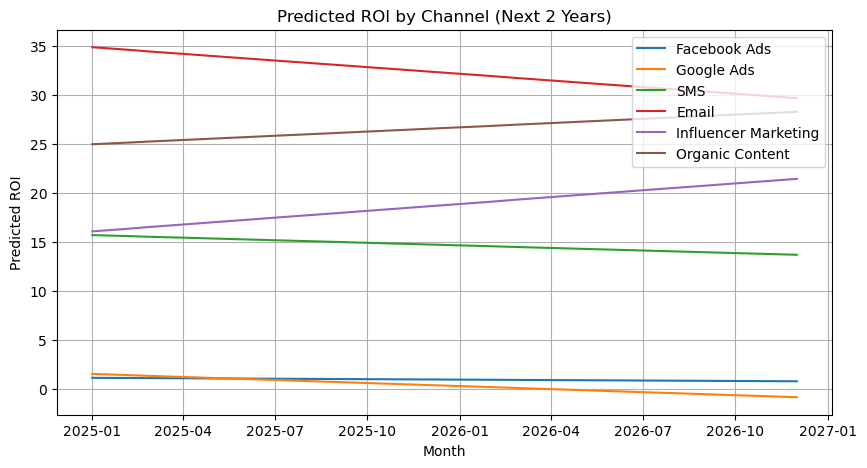

In [13]:
plt.figure(figsize=(10,5))

for ch, df in predictions.items():
    plt.plot(df['month'], df['predicted_ROI'], label=ch)

plt.title("Predicted ROI by Channel (Next 2 Years)")
plt.xlabel("Month")
plt.ylabel("Predicted ROI")
plt.legend()
plt.grid(True)
plt.show()
